In [1]:
import pandas as pd
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as MSE, r2_score

In [2]:
df = pd.read_csv('../../Datasets/Assignment 3/Ages.csv')
images = pkl.load(open('../../Datasets/Assignment 3/Compressed_images/Compressed_data_age_1','rb')) 

In [3]:
scaler = MinMaxScaler()
y = scaler.fit_transform(df['Age'].to_numpy().reshape(-1, 1))

In [4]:
y

array([[0.86086957],
       [0.86086957],
       [0.86086957],
       ...,
       [0.06956522],
       [0.06956522],
       [0.06956522]])

In [5]:
X_train,X_test,y_train,y_test = train_test_split(images,y,random_state=32)

In [6]:
y_test

array([[0.20869565],
       [0.2173913 ],
       [0.29565217],
       ...,
       [0.26086957],
       [0.33043478],
       [0.2173913 ]])

In [7]:
def load_compile_model(input_shape=(3072,)):
    img_inputs_layer = keras.Input(shape=input_shape)

    hidden_layer = layers.Dense(64,activation='relu')(img_inputs_layer) 

    output = layers.Dense(1,bias_initializer='ones')(hidden_layer)

    # Create the model
    model = tf.keras.models.Model(inputs=img_inputs_layer, outputs=output)
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')

    return model

In [8]:
model = load_compile_model()

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense (Dense)               (None, 64)                196672    
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 196,737
Trainable params: 196,737
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.load_weights('model_checkpoint.h5')

In [11]:
# Define the checkpoint path
checkpoint_path = "model_checkpoint.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_best_only=True)

In [12]:
history = model.fit(x=X_train,y=y_train,epochs=50,validation_split=0.1,verbose=2,callbacks=[checkpoint])

Epoch 1/50
501/501 - 2s - loss: 13.3141 - val_loss: 0.0303 - 2s/epoch - 3ms/step
Epoch 2/50
501/501 - 1s - loss: 0.0308 - val_loss: 0.0255 - 1s/epoch - 2ms/step
Epoch 3/50
501/501 - 1s - loss: 0.0276 - val_loss: 0.0383 - 881ms/epoch - 2ms/step
Epoch 4/50
501/501 - 1s - loss: 0.0258 - val_loss: 0.0303 - 861ms/epoch - 2ms/step
Epoch 5/50
501/501 - 1s - loss: 0.0236 - val_loss: 0.0194 - 1s/epoch - 2ms/step
Epoch 6/50
501/501 - 1s - loss: 0.0207 - val_loss: 0.0313 - 857ms/epoch - 2ms/step
Epoch 7/50
501/501 - 1s - loss: 0.0211 - val_loss: 0.0190 - 909ms/epoch - 2ms/step
Epoch 8/50
501/501 - 1s - loss: 0.0192 - val_loss: 0.0167 - 1s/epoch - 2ms/step
Epoch 9/50
501/501 - 1s - loss: 0.0177 - val_loss: 0.0189 - 972ms/epoch - 2ms/step
Epoch 10/50
501/501 - 1s - loss: 0.0167 - val_loss: 0.0155 - 977ms/epoch - 2ms/step
Epoch 11/50
501/501 - 1s - loss: 0.0167 - val_loss: 0.0188 - 922ms/epoch - 2ms/step
Epoch 12/50
501/501 - 1s - loss: 0.0174 - val_loss: 0.0362 - 928ms/epoch - 2ms/step
Epoch 13/50


In [13]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

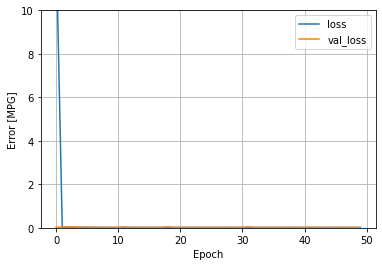

In [14]:
plot_loss(history)

In [15]:
y_pred = model.predict(X_test)

186/186 [==============================] - 0s 2ms/step


In [16]:
mse = MSE(y_test,y_pred)
r2 = r2_score(y_test,y_pred) 

In [17]:
print(f'Mean squared error test: {mse}')
print(f'R2 score: {r2}')

Mean squared error test: 0.014542552741824947
R2 score: 0.5148520709684843
